# Confronto telemetria LEC 22 vs VER 23

In [ ]:
import fastf1 as ff1
import pandas as pd
from fastf1.core import Laps
from fastf1 import plotting
from fastf1 import utils
from matplotlib import pyplot as plt
from timple.timedelta import strftimedelta
import numpy as np
from matplotlib.pyplot import figure
from matplotlib.collections import LineCollection
from matplotlib import cm

#carico i dati del 2023
ff1.Cache.enable_cache('2023Australia') 
race23 = ff1.get_session(2023, 'Australia', 'R')
race_laps23 = race23.load_laps(with_telemetry=True)
race23.load()

#carico i dati del 2022
ff1.Cache.enable_cache('2022Australia') 
race22 = ff1.get_session(2022, 'Australia', 'R')
race_laps22 = race22.load_laps(with_telemetry=True)
race22.load()

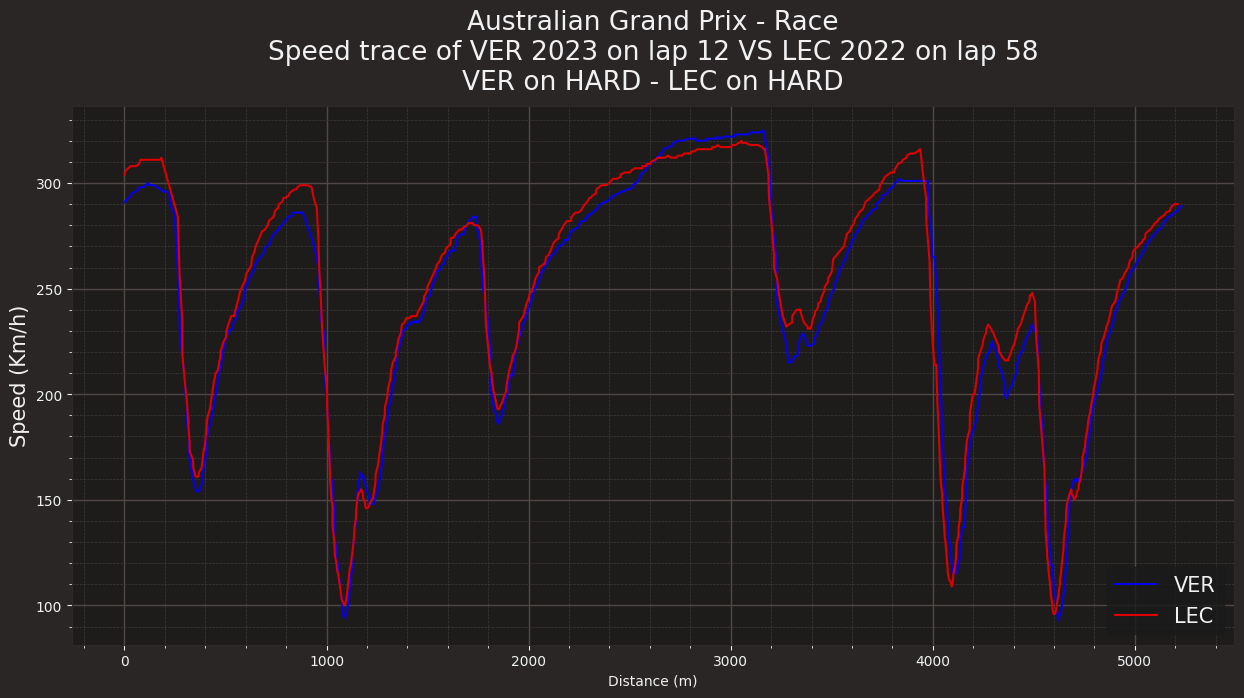

In [28]:
driver_1, driver_2 = 'VER', 'LEC'
laps_driver_1 = race23.laps.pick_driver(driver_1)
laps_driver_2 = race22.laps.pick_driver(driver_2)

fastest_driver_1 = laps_driver_1.loc[laps_driver_1['LapNumber']==12]
fastest_driver_2 = laps_driver_2.pick_fastest()

telemetry_driver_1 = fastest_driver_1.get_telemetry().add_distance()
telemetry_driver_2 = fastest_driver_2.get_telemetry().add_distance()

team_driver_1 = fastest_driver_1['Team']
team_driver_2 = fastest_driver_2['Team']

delta_time12, ref_tel12, compare_tel12 = utils.delta_time(fastest_driver_1, fastest_driver_2)

plot_size = [15, 7]
plot_title = f"{race23.event.EventName} - {race23.name}\nSpeed trace of {driver_1} {race23.event.year} on lap {int(fastest_driver_1.iloc[0]['LapNumber'])} VS {driver_2} {race22.event.year} on lap {fastest_driver_2.LapNumber}\n{driver_1} on {fastest_driver_1.iloc[0]['Compound']} - {driver_2} on {fastest_driver_2.Compound}"
plot_ratios = [1]

# Make plot a bit bigger
plt.rcParams['figure.figsize'] = plot_size
ff1.plotting.setup_mpl()
# Create subplots with different sizes
fig, ax = plt.subplots(1, gridspec_kw={'height_ratios': plot_ratios})

# Set the plot title
ax.title.set_text(plot_title)

# Speed trace
ax.plot(telemetry_driver_1['Distance'], telemetry_driver_1['Speed'], label=driver_1, color=ff1.plotting.team_color("Red Bull"))
ax.plot(telemetry_driver_2['Distance'], telemetry_driver_2['Speed'], label=driver_2, color=ff1.plotting.team_color(team_driver_2))
ax.set_ylabel("Speed (Km/h)")
ax.legend(loc="lower right", prop={'size': 15})
ax.set_xlabel("Distance (m)")
ax.yaxis.label.set_size(15)


In [ ]:
import fastf1 as ff1
import pandas as pd
from fastf1.core import Laps
from fastf1 import plotting
from fastf1 import utils
from matplotlib import pyplot as plt
from timple.timedelta import strftimedelta
import numpy as np
from matplotlib.pyplot import figure
from matplotlib.collections import LineCollection
from matplotlib import cm

#carico i dati del 2023
ff1.Cache.enable_cache('2023Australia') 
race23 = ff1.get_session(2023, 'Australia', 'R')
race_laps23 = race23.load_laps(with_telemetry=True)
race23.load()

#carico i dati del 2022
ff1.Cache.enable_cache('2022Australia') 
race22 = ff1.get_session(2022, 'Australia', 'R')
race_laps22 = race22.load_laps(with_telemetry=True)
race22.load()

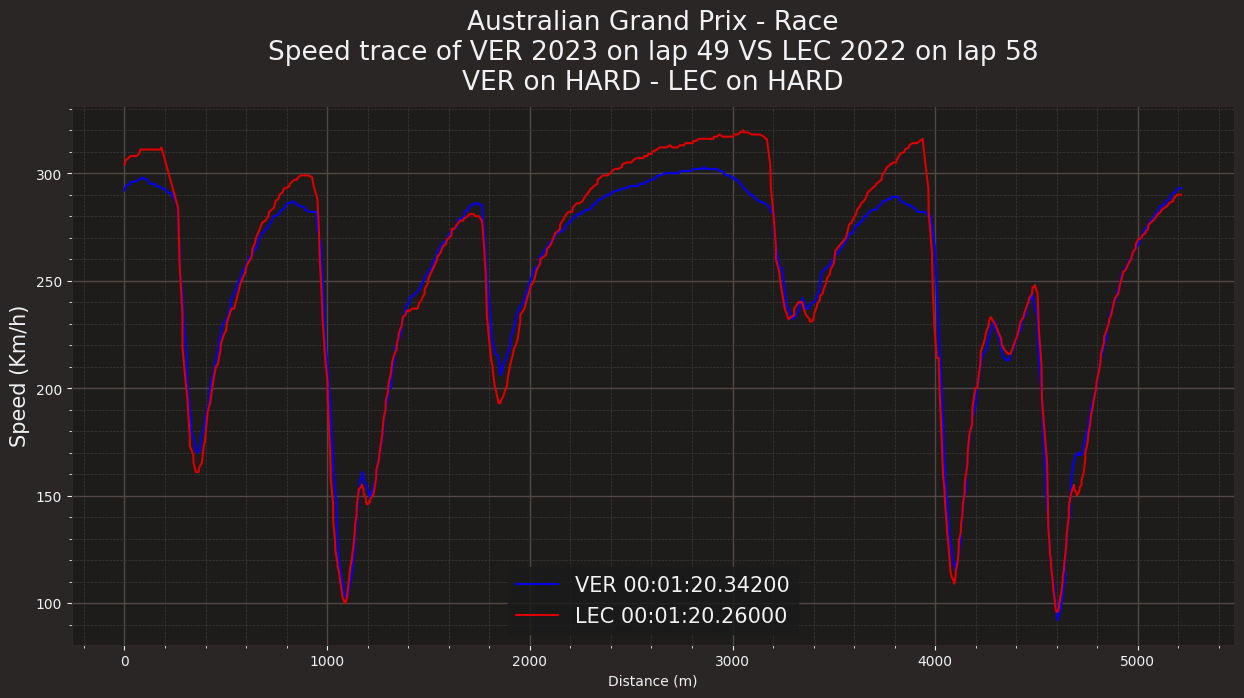

In [42]:
driver_1, driver_2 = 'VER', 'LEC'
laps_driver_1 = race23.laps.pick_driver(driver_1)
laps_driver_2 = race22.laps.pick_driver(driver_2)

fastest_driver_1 = laps_driver_1.pick_fastest()
fastest_driver_2 = laps_driver_2.pick_fastest()

telemetry_driver_1 = fastest_driver_1.get_telemetry().add_distance()
telemetry_driver_2 = fastest_driver_2.get_telemetry().add_distance()

team_driver_1 = fastest_driver_1['Team']
team_driver_2 = fastest_driver_2['Team']

delta_time12, ref_tel12, compare_tel12 = utils.delta_time(fastest_driver_1, fastest_driver_2)

plot_size = [15, 7]
plot_title = f"{race23.event.EventName} - {race23.name}\nSpeed trace of {driver_1} {race23.event.year} on lap {int(fastest_driver_1.LapNumber)} VS {driver_2} {race22.event.year} on lap {fastest_driver_2.LapNumber}\n{driver_1} on {fastest_driver_1.Compound} - {driver_2} on {fastest_driver_2.Compound}"
plot_ratios = [1]

# Make plot a bit bigger
plt.rcParams['figure.figsize'] = plot_size
ff1.plotting.setup_mpl()
# Create subplots with different sizes
fig, ax = plt.subplots(1, gridspec_kw={'height_ratios': plot_ratios})

# Set the plot title
ax.title.set_text(plot_title)

# Speed trace
ax.plot(telemetry_driver_1['Distance'], telemetry_driver_1['Speed'], label=f"{driver_1} {str(fastest_driver_1.LapTime)[7:21]}", color=ff1.plotting.team_color("Red Bull"))
ax.plot(telemetry_driver_2['Distance'], telemetry_driver_2['Speed'], label=f"{driver_2} {str(fastest_driver_2.LapTime)[7:21]}", color=ff1.plotting.team_color(team_driver_2))
ax.set_ylabel("Speed (Km/h)")
ax.legend(loc="lower center", prop={'size': 15})
ax.set_xlabel("Distance (m)")
ax.yaxis.label.set_size(15)


# analisi passo gara VER 23 vs LEC 22

In [ ]:
ff1.Cache.enable_cache('2023Australia') 
race23 = ff1.get_session(2023, 'Australia', 'R')
race_laps23 = race23.load_laps(with_telemetry=True)
race23.load()

#carico i dati del 2022
ff1.Cache.enable_cache('2022Australia') 
race22 = ff1.get_session(2022, 'Australia', 'R')
race_laps22 = race22.load_laps(with_telemetry=True)
race22.load()

In [ ]:

race_laps23['LapTimeSeconds'] = race_laps23['LapTime'].dt.total_seconds()
race_laps23 = race_laps23.loc[(race_laps23['PitOutTime'].isnull() & race_laps23['PitInTime'].isnull() 
                             & race_laps23['IsAccurate']==True) & race_laps23['LapNumber'].between(11, 58, inclusive = True)]

race_laps23 = race_laps23.loc[((race_laps23['Driver'] == "VER")  & (race_laps23['IsAccurate']==True))]

race_laps22['LapTimeSeconds'] = race_laps22['LapTime'].dt.total_seconds()
race_laps22 = race_laps22.loc[(race_laps22['PitOutTime'].isnull() & race_laps22['PitInTime'].isnull() 
                             & race_laps22['IsAccurate']==True) & race_laps22['LapNumber'].between(11, 58, inclusive = True)]

race_laps22 = race_laps22.loc[((race_laps22['Driver'] == "LEC")  & (race_laps22['IsAccurate']==True))]

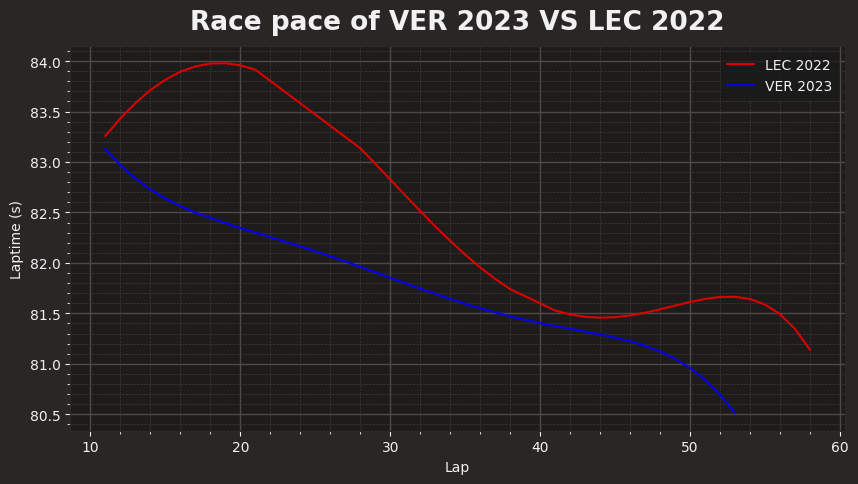

In [14]:
driver23="VER"
driver22="LEC"

# Make plot a bit bigger
plt.rcParams['figure.figsize'] = [10, 5]


ff1.plotting.setup_mpl()
fig, ax = plt.subplots()

# 2022 #
driver_laps22 = race_laps22.pick_driver(driver22)[['LapNumber', 'LapTimeSeconds', 'Team']]
# Select all the laps from that driver
driver_laps22 = driver_laps22.dropna()
# Extract the team for coloring purploses
team = pd.unique(driver_laps22['Team'])[0]

# X-coordinate is the lap number
x = driver_laps22['LapNumber']
# Y-coordinate a smoothed line between all the laptimes
poly = np.polyfit(driver_laps22['LapNumber'], driver_laps22['LapTimeSeconds'], 5)
y_poly = np.poly1d(poly)(driver_laps22['LapNumber'])
#y = seconds=driver_laps22['LapTimeSeconds']
# Make sure that two teammates don't get the same line style
linestyle = '-' 
# Plot the data
ax.plot(x, y_poly, label=driver22+" 2022", color=ff1.plotting.team_color(team), linestyle=linestyle)


# 2023 #
driver_laps23 = race_laps23.pick_driver(driver23)[['LapNumber', 'LapTimeSeconds', 'Team']]
# Select all the laps from that driver
driver_laps23 = driver_laps23.dropna()
# Extract the team for coloring purploses
team = pd.unique(driver_laps23['Team'])[0]
# X-coordinate is the lap number
x = driver_laps23['LapNumber']
# Y-coordinate a smoothed line between all the laptimes
poly = np.polyfit(driver_laps23['LapNumber'], driver_laps23['LapTimeSeconds'], 5)
y_poly = np.poly1d(poly)(driver_laps23['LapNumber'])
# Make sure that two teammates don't get the same line style
linestyle = '-' 
# Plot the data
ax.plot(x, y_poly, label=driver23+" 2023", color=ff1.plotting.team_color(team), linestyle=linestyle)

# Append labels
ax.set(ylabel = 'Laptime (s)')
ax.set(xlabel = 'Lap')

# Set title
ax.set_title(f"Race pace of {driver23} 2023 VS {driver22} 2022", fontweight = 'bold')

# Generate legend
ax.legend()

# Confronto telemetrie piloti che han fatto il giro velocein gara: 
# 2022 LEC & 2023 PER

In [ ]:
import fastf1 as ff1
import pandas as pd
from fastf1.core import Laps
from fastf1 import plotting
from fastf1 import utils
from matplotlib import pyplot as plt
from timple.timedelta import strftimedelta
import numpy as np
from matplotlib.pyplot import figure
from matplotlib.collections import LineCollection
from matplotlib import cm

#carico i dati del 2023
ff1.Cache.enable_cache('2023Australia') 
race23 = ff1.get_session(2023, 'Australia', 'R')
race_laps23 = race23.load_laps(with_telemetry=True)
race23.load()

#carico i dati del 2022
ff1.Cache.enable_cache('2022Australia') 
race22 = ff1.get_session(2022, 'Australia', 'R')
race_laps22 = race22.load_laps(with_telemetry=True)
race22.load()

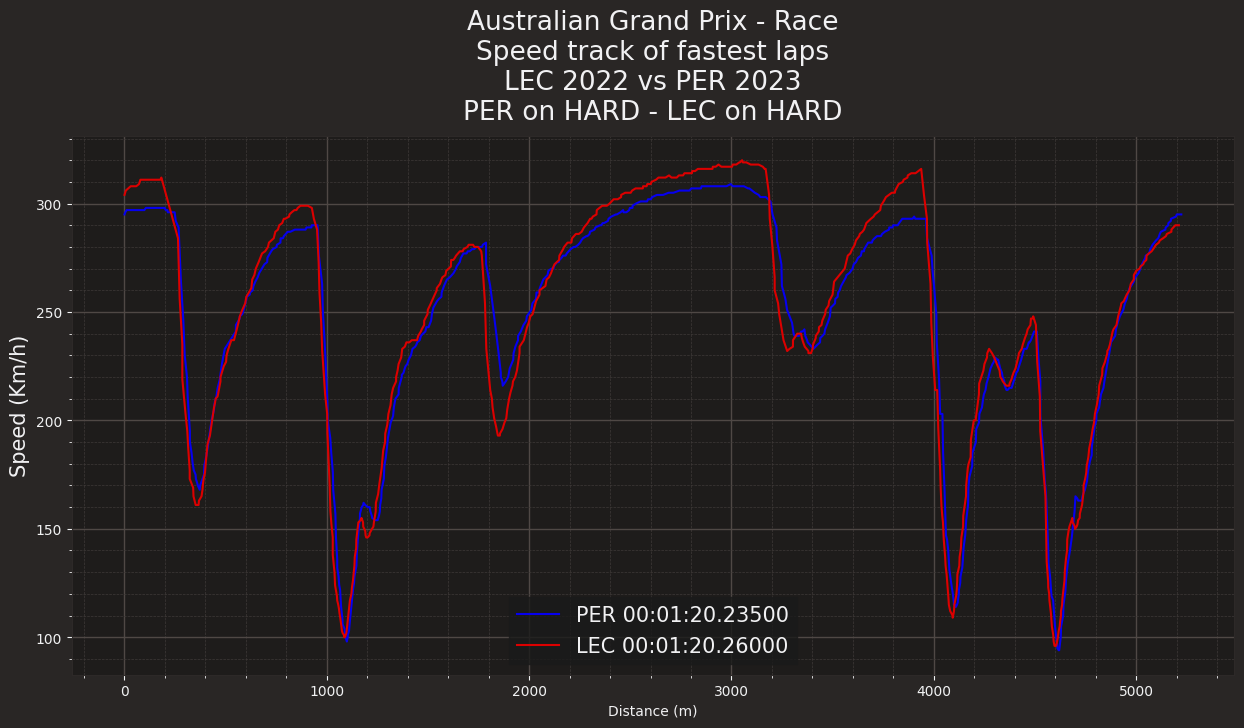

In [43]:
driver_1, driver_2 = 'PER', 'LEC'
laps_driver_1 = race23.laps.pick_driver(driver_1)
laps_driver_2 = race22.laps.pick_driver(driver_2)

fastest_driver_1 = laps_driver_1.pick_fastest()
fastest_driver_2 = laps_driver_2.pick_fastest()

telemetry_driver_1 = fastest_driver_1.get_telemetry().add_distance()
telemetry_driver_2 = fastest_driver_2.get_telemetry().add_distance()

team_driver_1 = fastest_driver_1['Team']
team_driver_2 = fastest_driver_2['Team']

delta_time12, ref_tel12, compare_tel12 = utils.delta_time(fastest_driver_1, fastest_driver_2)

plot_size = [15, 7]
plot_title = f"{race23.event.EventName} - {race23.name}\nSpeed track of fastest laps\n{driver_2} 2022 vs {driver_1} 2023\n{driver_1} on {fastest_driver_1.Compound} - {driver_2} on {fastest_driver_2.Compound}"
plot_ratios = [1]

# Make plot a bit bigger
plt.rcParams['figure.figsize'] = plot_size
ff1.plotting.setup_mpl()
# Create subplots with different sizes
fig, ax = plt.subplots(1, gridspec_kw={'height_ratios': plot_ratios})

# Set the plot title
ax.title.set_text(plot_title)

# Speed trace
ax.plot(telemetry_driver_1['Distance'], telemetry_driver_1['Speed'], label=f"{driver_1} {str(fastest_driver_1.LapTime)[7:21]}", color=ff1.plotting.team_color("Red Bull"))
ax.plot(telemetry_driver_2['Distance'], telemetry_driver_2['Speed'], label=f"{driver_2} {str(fastest_driver_2.LapTime)[7:21]}", color=ff1.plotting.team_color(team_driver_2))
ax.set_ylabel("Speed (Km/h)")
ax.legend(loc="lower center", prop={'size': 15})
ax.set_xlabel("Distance (m)")
ax.yaxis.label.set_size(15)
